In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as offen_LANpa
import nltk as offen_LANlln
offen_LANlln.download('stopwords')
import regex as offen_LANrrr
from nltk.corpus import stopwords as offen_LANsttp
from sklearn.feature_extraction.text import TfidfVectorizer as offen_LANidf
import numpy as offen_LANmnn 
from sklearn.model_selection import train_test_split as offen_LANsli

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


*** train, test & valid OLID data

In [3]:
offen_LAN_TR = offen_LANpa.read_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/train.csv')
offen_LAN_TS = offen_LANpa.read_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/test.csv')
offen_LAN_VL = offen_LANpa.read_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/valid.csv')

In [4]:
offen_LAN_TR

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF
...,...,...,...
12308,92805,And Soros money in their pocket. #maga🇺🇸🇺🇸🇺🇸🇺🇸...,NOT
12309,35989,@USER ur a fucking dumbass fr. there’s no way ...,OFF
12310,30188,.@USER They both want you to believe in yourse...,NOT
12311,96815,@USER It's like a reading a leaflet from Antif...,OFF


In [5]:
offen_LAN_TR['label'].value_counts()

NOT    8221
OFF    4092
Name: label, dtype: int64

In [6]:
offen_LAN_TS

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF
...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT


In [7]:
offen_LAN_TS['label'].value_counts()

NOT    620
OFF    240
Name: label, dtype: int64

In [8]:
offen_LAN_VL

,id,tweet,label
0,12476,@USER @USER @USER Trump is declassifying infor...,NOT
1,23242,@USER Ha even with them trying to rig the syst...,NOT
2,97885,@USER @USER @USER Man you really thought this ...,NOT
3,43414,@USER Ms. Clinton - you are a class act. My re...,OFF
4,81403,@USER It’s still here at 753. If someone did t...,NOT
...,...,...,...
922,22519,@USER @USER She is as dumb as she looks,OFF
923,58715,@USER If you cant give me stitches when I get ...,NOT
924,46544,@USER need more ladies to spread out their pus...,OFF
925,70368,@USER I cant believe he didnt work in comet pi...,OFF


In [9]:
offen_LAN_VL['label'].value_counts()

NOT    619
OFF    308
Name: label, dtype: int64

In [10]:
offen_LAN_TR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12313 entries, 0 to 12312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12313 non-null  int64 
 1   tweet   12313 non-null  object
 2   label   12313 non-null  object
dtypes: int64(1), object(2)
memory usage: 288.7+ KB


*** Clensing

In [11]:
offen_LAN_TR.isna().any()

id       False
tweet    False
label    False
dtype: bool

False results shows zero null 

*** NLTK feature processing

In [12]:
offen_LANsttp_V = offen_LANsttp.words('english')

In [13]:
def OLID_F(O):                    
    O = O.lower()
    O = offen_LANrrr.sub("[^a-z]+", " ", O)
    O = " ".join([f for f in O.split() if f not in offen_LANsttp_V])
    return O

In [14]:
OLID_vari=[]
for O in offen_LAN_TR['tweet']:
    OLID_vari.append(OLID_F(O))
offen_LAN_TR['tweet']=OLID_vari
offen_LAN_TR['tweet'].head(n=7)

0    user done well intentional th hour attack comp...
1        k followers k go get goal trumptrain maga kag
2          user tom bought interested tom constituents
3            user user even brother thinks monster url
4    user user user user user understand someone kn...
5        user help help liberals sexual assaults facts
6    user user knows something liberals want talk s...
Name: tweet, dtype: object

** Count Vectorzation

In [15]:
offen_LAN_TR_in= offen_LAN_TR['tweet']
offen_LAN_TR_ot= offen_LAN_TR['label']

offen_LANidf_V = offen_LANidf(analyzer='char')
offen_LANidf_V = offen_LANidf_V.fit(offen_LAN_TR_in.apply(lambda ip: offen_LANmnn.str_(ip)))

In [16]:
offen_LANidf_V

TfidfVectorizer(analyzer='char')

In [17]:
## fn to call tfidf vectrzr
def TFIdf(i):
  i = offen_LANidf_V.transform(i.apply(lambda ip: offen_LANmnn.str_(ip)))
  i=i.toarray()
  return i

In [18]:
offen_LAN_TR_in= TFIdf(offen_LAN_TR_in)
offen_LAN_TR_in

array([[0.46946487, 0.34538266, 0.03489553, ..., 0.        , 0.1012026 ,
        0.        ],
       [0.51924131, 0.35812773, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34064975, 0.        , 0.1063467 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47544987, 0.2248623 , 0.14136158, ..., 0.        , 0.        ,
        0.        ],
       [0.43100439, 0.40768394, 0.19222046, ..., 0.        , 0.        ,
        0.        ],
       [0.50233885, 0.18478393, 0.05227469, ..., 0.        , 0.10106996,
        0.        ]])

# **@@ TASK 1: Model Selection @@**

In [19]:
#### SVM -First model
from sklearn.svm import SVC as offen_LAN_sv

#### multinomial LR- Second model
from sklearn.linear_model import LogisticRegression as offen_LAN_lr

# **@@ TASK 2: Devising and training your own classifier @@**

In [20]:
from sklearn.metrics import classification_report as offen_LANcsf
from sklearn.metrics import confusion_matrix as offen_LANoncf
from sklearn import metrics as offen_LANtrm
import joblib as offen_LANbbj

### SVM -First model

In [21]:
first_mod = offen_LAN_sv() 
first_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)

SVC()

extraction of features for validation data using count Vectorizer

In [22]:
offen_LAN_VL_in= offen_LAN_VL['tweet']
offen_LAN_VL_in= TFIdf(offen_LAN_VL_in)
print(offen_LAN_VL_in)
offen_LAN_VL_ot= offen_LAN_VL['label']

[[0.61531502 0.25692864 0.10383451 ... 0.         0.12547361 0.        ]
 [0.56264683 0.14111458 0.03992079 ... 0.         0.11577667 0.        ]
 [0.5829766  0.17545607 0.         ... 0.         0.15994661 0.        ]
 ...
 [0.61141953 0.18401642 0.         ... 0.         0.08387513 0.        ]
 [0.58070343 0.19224911 0.04532213 ... 0.0895599  0.         0.20748312]
 [0.54545936 0.15048427 0.         ... 0.         0.         0.        ]]


In [23]:
import warnings as offen_LANWrg
offen_LANWrg.simplefilter("ignore")

In [24]:
offen_LAN_pdr = first_mod.predict(offen_LAN_VL_in)
print(offen_LANcsf(offen_LAN_pdr, offen_LAN_VL_ot))

              precision    recall  f1-score   support

         NOT       0.97      0.68      0.80       888
         OFF       0.07      0.59      0.13        39

    accuracy                           0.68       927
   macro avg       0.52      0.63      0.47       927
weighted avg       0.94      0.68      0.77       927



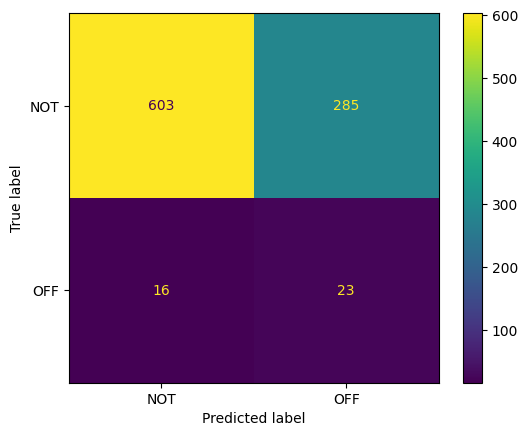

In [25]:
cmm = offen_LANoncf(offen_LAN_pdr, offen_LAN_VL_ot)
cmm_p=offen_LANtrm.ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = ['NOT', 'OFF'])
cmm_p.plot()

### SVM -First model hypertuning

              precision    recall  f1-score   support

         NOT       0.94      0.68      0.79       858
         OFF       0.11      0.48      0.18        69

    accuracy                           0.66       927
   macro avg       0.52      0.58      0.48       927
weighted avg       0.88      0.66      0.74       927



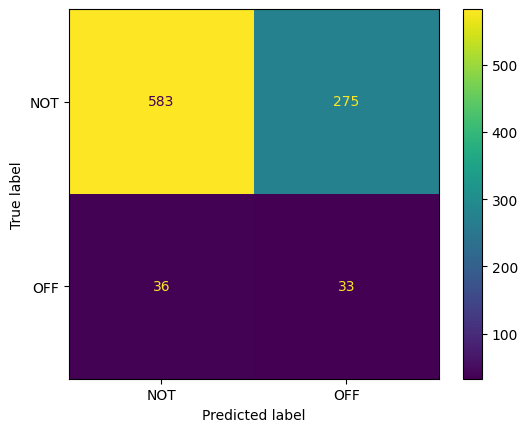

In [26]:
first_mod = offen_LAN_sv(kernel='poly', decision_function_shape='ovr') 
first_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)

offen_LAN_pdr = first_mod.predict(offen_LAN_VL_in)
print(offen_LANcsf(offen_LAN_pdr, offen_LAN_VL_ot))

cmm = offen_LANoncf(offen_LAN_pdr, offen_LAN_VL_ot)
cmm_p=offen_LANtrm.ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = ['NOT', 'OFF'])
cmm_p.plot()

              precision    recall  f1-score   support

         NOT       0.71      0.70      0.70       626
         OFF       0.39      0.40      0.39       301

    accuracy                           0.60       927
   macro avg       0.55      0.55      0.55       927
weighted avg       0.60      0.60      0.60       927



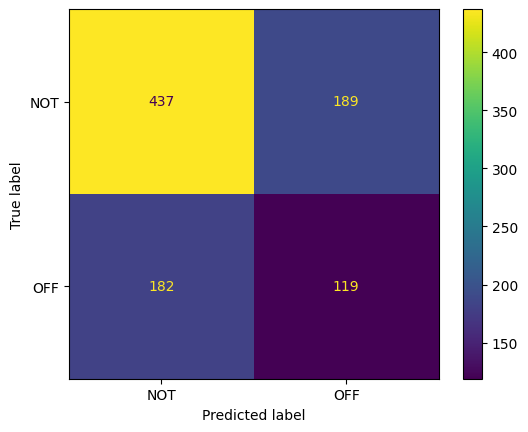

In [27]:
first_mod = offen_LAN_sv(kernel='sigmoid', decision_function_shape='ovo') 
first_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)

offen_LAN_pdr = first_mod.predict(offen_LAN_VL_in)
print(offen_LANcsf(offen_LAN_pdr, offen_LAN_VL_ot))

cmm = offen_LANoncf(offen_LAN_pdr, offen_LAN_VL_ot)
cmm_p=offen_LANtrm.ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = ['NOT', 'OFF'])
cmm_p.plot()

In [28]:
# this is the svm model
first_mod = offen_LAN_sv() 
first_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)

SVC()

###  Test the first mod by test data

In [29]:
def test_the_md(md):
  offen_LAN_TS_in= offen_LAN_TS['tweet']
  offen_LAN_TS_in= TFIdf(offen_LAN_TS_in)
  offen_LAN_TS_ot= offen_LAN_TS['label']

  offen_LAN_pdr = md.predict(offen_LAN_TS_in)
  print(offen_LANcsf(offen_LAN_pdr, offen_LAN_TS_ot))

  cmm = offen_LANoncf(offen_LAN_pdr, offen_LAN_TS_ot)
  cmm_p=offen_LANtrm.ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = ['NOT', 'OFF'])
  cmm_p.plot()

  offen_LAN_TS['out_label']=offen_LANpa.DataFrame(offen_LAN_pdr)
  display(offen_LAN_TS)

              precision    recall  f1-score   support

         NOT       0.99      0.73      0.84       843
         OFF       0.05      0.71      0.09        17

    accuracy                           0.73       860
   macro avg       0.52      0.72      0.47       860
weighted avg       0.97      0.73      0.83       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


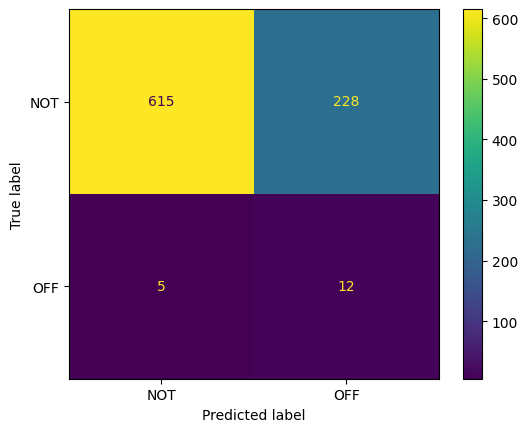

In [30]:
test_the_md(first_mod)

### Multinomial Logistic regression -First model

In [31]:
sec_mod = offen_LAN_lr(multi_class='multinomial') 
sec_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)

LogisticRegression(multi_class='multinomial')

              precision    recall  f1-score   support

         NOT       0.90      0.70      0.79       798
         OFF       0.22      0.53      0.31       129

    accuracy                           0.68       927
   macro avg       0.56      0.61      0.55       927
weighted avg       0.81      0.68      0.72       927



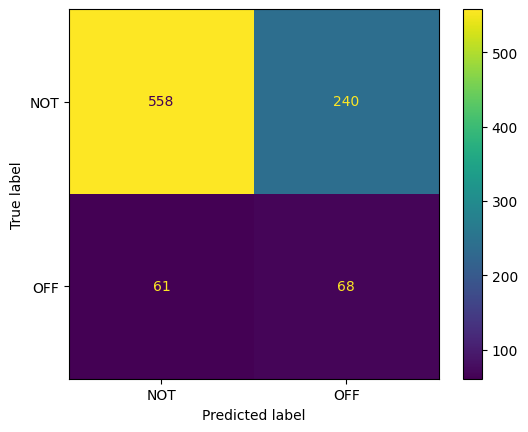

In [32]:
offen_LAN_pdr = sec_mod.predict(offen_LAN_VL_in)
print(offen_LANcsf(offen_LAN_pdr, offen_LAN_VL_ot))

cmm = offen_LANoncf(offen_LAN_pdr, offen_LAN_VL_ot)
cmm_p=offen_LANtrm.ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = ['NOT', 'OFF'])
cmm_p.plot()

### Multinomial LR -second model hypertuning

              precision    recall  f1-score   support

         NOT       0.90      0.70      0.79       798
         OFF       0.22      0.53      0.31       129

    accuracy                           0.68       927
   macro avg       0.56      0.61      0.55       927
weighted avg       0.81      0.68      0.72       927



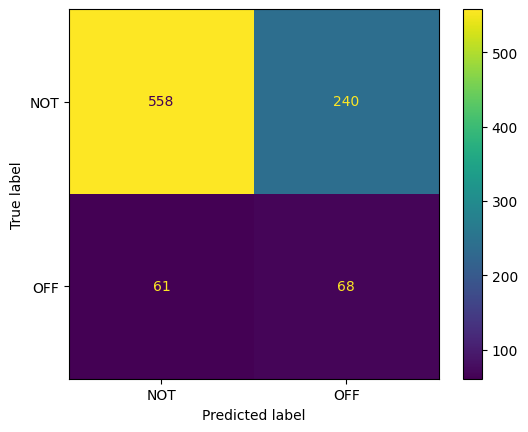

In [33]:
sec_mod = offen_LAN_lr(multi_class='multinomial', solver='sag') 
sec_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)

offen_LAN_pdr = sec_mod.predict(offen_LAN_VL_in)
print(offen_LANcsf(offen_LAN_pdr, offen_LAN_VL_ot))

cmm = offen_LANoncf(offen_LAN_pdr, offen_LAN_VL_ot)
cmm_p=offen_LANtrm.ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = ['NOT', 'OFF'])
cmm_p.plot()

              precision    recall  f1-score   support

         NOT       0.90      0.70      0.79       798
         OFF       0.22      0.53      0.31       129

    accuracy                           0.68       927
   macro avg       0.56      0.61      0.55       927
weighted avg       0.81      0.68      0.72       927



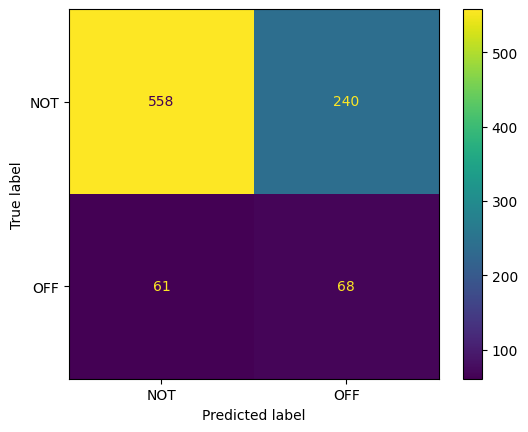

In [34]:
sec_mod = offen_LAN_lr(multi_class='multinomial', solver='saga') 
sec_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)

offen_LAN_pdr = sec_mod.predict(offen_LAN_VL_in)
print(offen_LANcsf(offen_LAN_pdr, offen_LAN_VL_ot))

cmm = offen_LANoncf(offen_LAN_pdr, offen_LAN_VL_ot)
cmm_p=offen_LANtrm.ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = ['NOT', 'OFF'])
cmm_p.plot()

In [35]:
# this is the multinomial Log Regr model
sec_mod = offen_LAN_lr(multi_class='multinomial') 
sec_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)

LogisticRegression(multi_class='multinomial')

###  Test the second mod by test data

              precision    recall  f1-score   support

         NOT       0.86      0.74      0.79       721
         OFF       0.22      0.37      0.27       139

    accuracy                           0.68       860
   macro avg       0.54      0.56      0.53       860
weighted avg       0.76      0.68      0.71       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


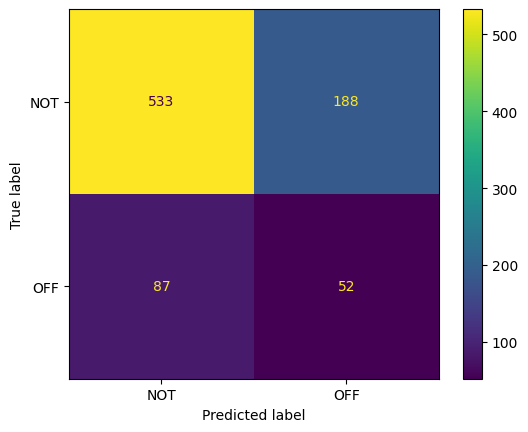

In [36]:
test_the_md(sec_mod)

### first and second model's function

In [37]:
#model for svm classifier
def first_md(data):
  offen_LAN_TR_in =data['tweet']
  offen_LAN_TR_in = TFIdf(offen_LAN_TR_in)
  offen_LAN_TR_ot =data['label']

  first_mod= offen_LAN_sv() 
  first_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)
  test_the_md(first_mod)

In [38]:
#model for multinomial Log reg classifier
def sec_md(data):
  offen_LAN_TR_in =data['tweet']
  offen_LAN_TR_in = TFIdf(offen_LAN_TR_in)
  offen_LAN_TR_ot =data['label']

  sec_mod = offen_LAN_lr(multi_class='multinomial') 
  sec_mod.fit(offen_LAN_TR_in, offen_LAN_TR_ot)
  test_the_md(sec_mod)

# **@@ TASK 3: Data Size Effect @@**

## train tweet data into 4 size [25% & 50% & 75% & 100%]

a) 25% train dataset

In [39]:
tr25 = offen_LANsli(offen_LAN_TR,  random_state=2202392, test_size=0.75) 
train_1= tr25[0]
train_1.shape

(3078, 3)

In [40]:
offen_LAN_TR_in= TFIdf(train_1['tweet'])

              precision    recall  f1-score   support

         NOT       1.00      0.73      0.84       849
         OFF       0.03      0.73      0.06        11

    accuracy                           0.73       860
   macro avg       0.51      0.73      0.45       860
weighted avg       0.98      0.73      0.83       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


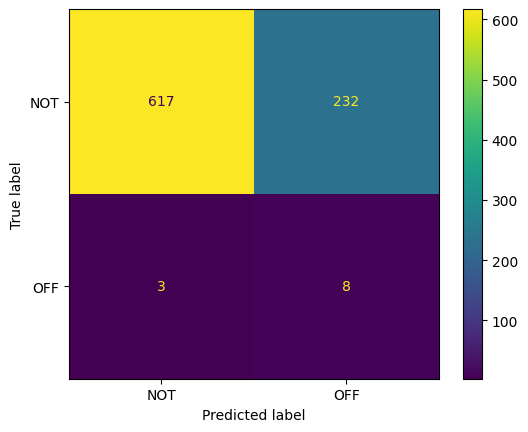

In [41]:
first_md(train_1)
offen_LANbbj.dump(first_mod, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/25/model.sav')
offen_LANbbj.dump(offen_LAN_TR_in, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/25/vectorizer.sav')
offen_LAN_TS.to_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/25/output_test.csv', index=False)

              precision    recall  f1-score   support

         NOT       0.82      0.75      0.78       673
         OFF       0.30      0.39      0.34       187

    accuracy                           0.67       860
   macro avg       0.56      0.57      0.56       860
weighted avg       0.70      0.67      0.69       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


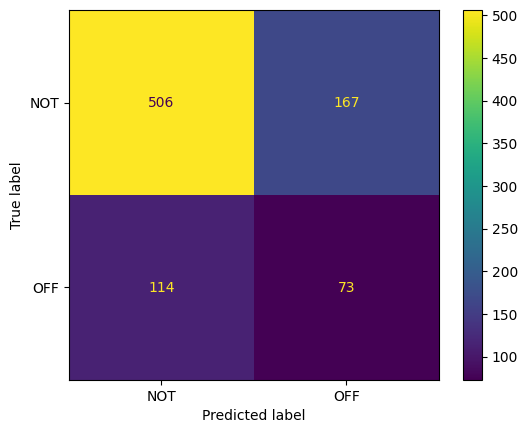

In [42]:
sec_md(train_1)
offen_LANbbj.dump(sec_mod, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/25/model.sav')
offen_LANbbj.dump(offen_LAN_TR_in, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/25/vectorizer.sav')
offen_LAN_TS.to_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/25/output_test.csv', index=False)

b) 50% train dataset

In [43]:
tr50 = offen_LANsli(offen_LAN_TR,  random_state=2202392, test_size=0.50)
train_2= tr50[0]
train_2.shape

(6156, 3)

In [44]:
offen_LAN_TR_in= TFIdf(train_2['tweet'])

              precision    recall  f1-score   support

         NOT       0.99      0.73      0.84       839
         OFF       0.06      0.71      0.11        21

    accuracy                           0.73       860
   macro avg       0.53      0.72      0.48       860
weighted avg       0.97      0.73      0.82       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


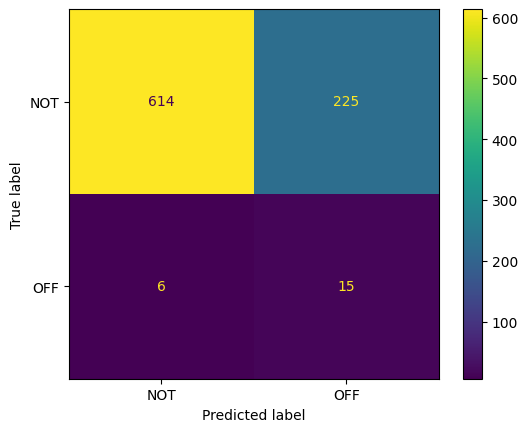

In [45]:
first_md(train_2)
offen_LANbbj.dump(first_mod, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/50/model.sav')
offen_LANbbj.dump(offen_LAN_TR_in, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/50/vectorizer.sav')
offen_LAN_TS.to_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/50/output_test.csv', index=False)

              precision    recall  f1-score   support

         NOT       0.84      0.74      0.79       704
         OFF       0.24      0.37      0.29       156

    accuracy                           0.67       860
   macro avg       0.54      0.56      0.54       860
weighted avg       0.73      0.67      0.70       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


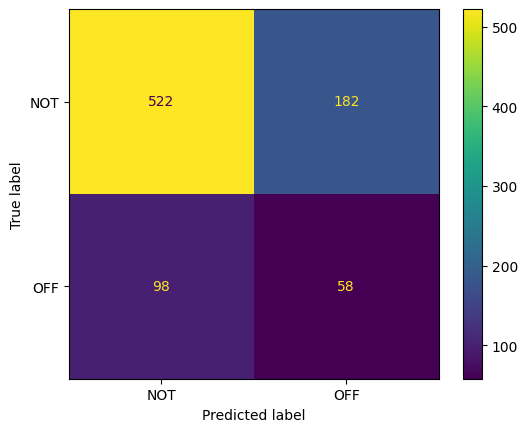

In [46]:
sec_md(train_2)
offen_LANbbj.dump(sec_mod, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/50/model.sav')
offen_LANbbj.dump(offen_LAN_TR_in, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/50/vectorizer.sav')
offen_LAN_TS.to_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/50/output_test.csv', index=False)

c) 75% train dataset

In [47]:
tr75 = offen_LANsli(offen_LAN_TR,  random_state=2202392, test_size=0.25) 
train_3= tr75[0]
train_3.shape

(9234, 3)

In [48]:
offen_LAN_TR_in= TFIdf(train_3['tweet'])

              precision    recall  f1-score   support

         NOT       0.99      0.73      0.84       842
         OFF       0.05      0.72      0.10        18

    accuracy                           0.73       860
   macro avg       0.52      0.73      0.47       860
weighted avg       0.97      0.73      0.83       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


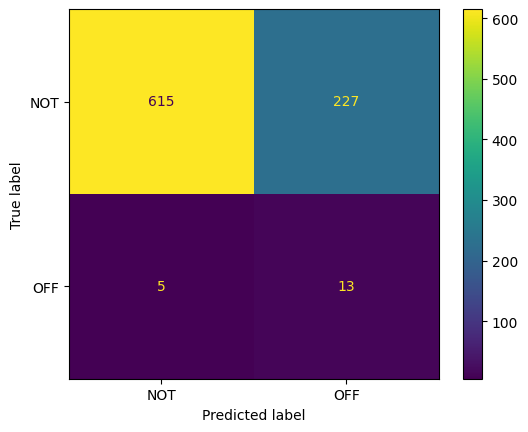

In [49]:
first_md(train_3)
offen_LANbbj.dump(first_mod, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/75/model.sav')
offen_LANbbj.dump(offen_LAN_TR_in, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/75/vectorizer.sav')
offen_LAN_TS.to_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/75/output_test.csv', index=False)

              precision    recall  f1-score   support

         NOT       0.84      0.74      0.79       704
         OFF       0.24      0.37      0.29       156

    accuracy                           0.67       860
   macro avg       0.54      0.56      0.54       860
weighted avg       0.73      0.67      0.70       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


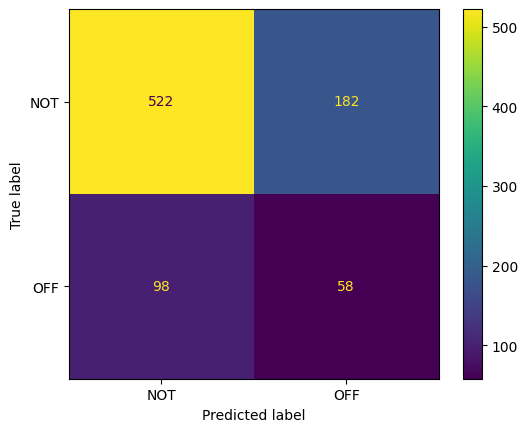

In [50]:
sec_md(train_3)
offen_LANbbj.dump(sec_mod, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/75/model.sav')
offen_LANbbj.dump(offen_LAN_TR_in, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/75/vectorizer.sav')
offen_LAN_TS.to_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/75/output_test.csv', index=False)

d) 100% train dataset

In [51]:
tr100 = offen_LANsli(offen_LAN_TR,  random_state=2202392, test_size=0.00001) 
train_4= tr100[0]
train_4.shape

(12312, 3)

In [52]:
offen_LAN_TR_in= TFIdf(train_4['tweet'])

              precision    recall  f1-score   support

         NOT       0.99      0.73      0.84       843
         OFF       0.05      0.71      0.09        17

    accuracy                           0.73       860
   macro avg       0.52      0.72      0.47       860
weighted avg       0.97      0.73      0.83       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


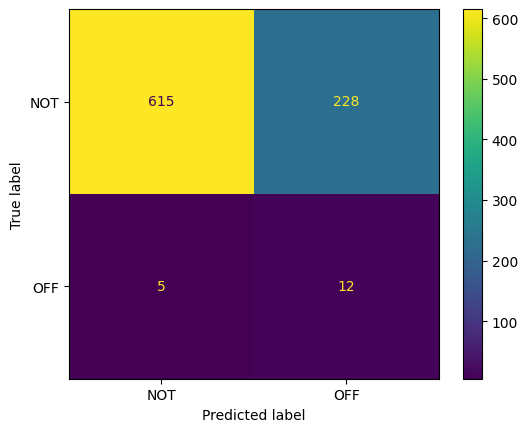

In [53]:
first_md(train_4)
offen_LANbbj.dump(first_mod, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/100/model.sav')
offen_LANbbj.dump(offen_LAN_TR_in, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/100/vectorizer.sav')
offen_LAN_TS.to_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/1/100/output_test.csv', index=False)

              precision    recall  f1-score   support

         NOT       0.86      0.74      0.79       721
         OFF       0.22      0.37      0.27       139

    accuracy                           0.68       860
   macro avg       0.54      0.56      0.53       860
weighted avg       0.76      0.68      0.71       860



,id,tweet,label,out_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,NOT


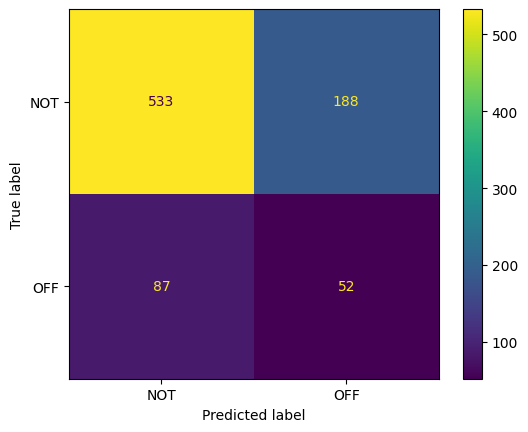

In [54]:
sec_md(train_4)
offen_LANbbj.dump(sec_mod, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/100/model.sav')
offen_LANbbj.dump(offen_LAN_TR_in, '/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/100/vectorizer.sav')
offen_LAN_TS.to_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/Models/2/100/output_test.csv', index=False)

validation and testing set performance - first model

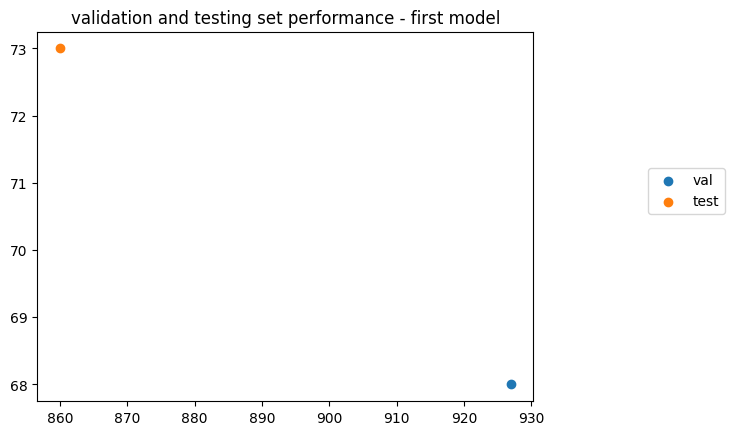

In [55]:
import matplotlib.pyplot as offen_LAN_mlt

shape_for_val = [offen_LAN_VL.shape[0]]
shape_for_te= [offen_LAN_TS.shape[0]]
acy_for_val = [68]
acy_for_te= [73]

offen_LAN_mlt.scatter(shape_for_val, acy_for_val)
offen_LAN_mlt.scatter(shape_for_te, acy_for_te)
offen_LAN_mlt.legend(["val", "test"], loc='upper right', bbox_to_anchor=(1.4, .65))
offen_LAN_mlt.title('validation and testing set performance - first model')
offen_LAN_mlt.show()

accuracy is low for validation data in first model implementation.

validation and testing set performance - second model

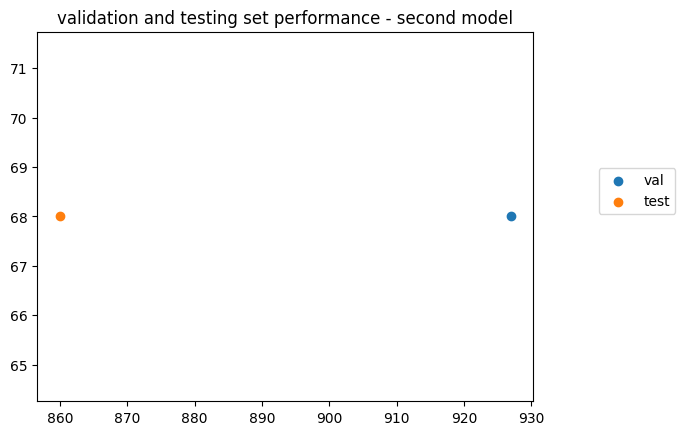

In [56]:
acy_for_val = [68]
acy_for_te= [68]

offen_LAN_mlt.scatter(shape_for_val, acy_for_val)
offen_LAN_mlt.scatter(shape_for_te, acy_for_te)
offen_LAN_mlt.legend(["val", "test"], loc='upper right', bbox_to_anchor=(1.3, .65))
offen_LAN_mlt.title('validation and testing set performance - second model')
offen_LAN_mlt.show()

Both validation & test data accuracy is equal for in second model implementation.

## Five different offensive language data - Example task

In [57]:
"""the below functions includes all the necessary steps like preprocessing data splitting"""

def percentage(da_fm): 
  SZ= [0.75, 0.50, 0.25, 1]
  for D in SZ:
    da_fme = offen_LANsli(da_fm, test_size= D, random_state=2202392) 
    da_fme= da_fme[0]
    offen_LAN_in= TFIdf(da_fme[da_fme.columns[0]])
    offen_LAN_ot= da_fme[da_fme.columns[1]]
    print(da_fme.shape)
    SVM_M(da_fme)
    LR_M(da_fme)
    print("\n\n")

##  function - preprocess procedure
def nan(da_fm):
  if da_fm.isnull().values.any()==True:
     da_fm=da_fm.dropna()

def repeated(da_fm):
  if da_fm[da_fm.duplicated()].shape[0]==0:
     da_fm=da_fm.drop_duplicates()

def SVM_M(da_fm): # model-1

  from sklearn.metrics import confusion_matrix as offen_LANfucon
  offen_LAN_in= da_fm[da_fm.columns[0]]
  offen_LAN_in= TFIdf(offen_LAN_in)
  offen_LAN_ot= da_fm[da_fm.columns[1]]
  
  offen_LAN_in1, offen_LAN_in2, offen_LAN_ot1, offen_LAN_ot2 = offen_LANsli(offen_LAN_in, offen_LAN_ot, test_size= 0.30, random_state=2202392)
  first_mod = offen_LAN_sv() 
  first_mod.fit(offen_LAN_in1, offen_LAN_ot1)
  
  offen_LAN_pdr = first_mod.predict(offen_LAN_in2)
  print(offen_LANcsf(offen_LAN_pdr, offen_LAN_ot2))
  print(offen_LANoncf(offen_LAN_pdr, offen_LAN_ot2))


def LR_M(da_fm): # model-2

  from sklearn.metrics import confusion_matrix as offen_LANfucon
  offen_LAN_in= da_fm[da_fm.columns[0]]
  offen_LAN_in= TFIdf(offen_LAN_in)
  offen_LAN_ot= da_fm[da_fm.columns[1]]
  offen_LAN_in1, offen_LAN_in2, offen_LAN_ot1, offen_LAN_ot2 = offen_LANsli(offen_LAN_in, offen_LAN_ot, test_size= 0.30, random_state=2202392)

  sec_mod = offen_LAN_lr(multi_class='multinomial') 
  sec_mod.fit(offen_LAN_in1, offen_LAN_ot1)
  
  offen_LAN_pdr = sec_mod.predict(offen_LAN_in2)
  print(offen_LANcsf(offen_LAN_pdr, offen_LAN_ot2))
  print(offen_LANoncf(offen_LAN_pdr, offen_LAN_ot2))

Example-1

In [58]:
Example1 = offen_LANpa.read_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/2019-05-28_portuguese_hate_speech_binary_classification.csv')
Example1= Example1[['text', 'hatespeech_comb']]
Example1 = Example1.replace([0, 1],['NOT', 'OFF'])
nan(Example1)
repeated(Example1)
Example1

,text,hatespeech_comb
0,@__andrea__b \nO cara vive em outro mundo\nNão...,OFF
1,@_carmeloneto Estes incompetentes não cuidam n...,NOT
2,@_carmeloneto \nOs 'cumpanhero' quebraram toda...,NOT
3,@_GlitteryKisses é isso não conseguem pensar n...,NOT
4,@_iglira bom dia macaco branco haha,OFF
...,...,...
5665,@zecarlosantos2 é o unico que nao se corrompe....,NOT
5666,"@zqkitowz sei das cotas, mas não sabia disso, ...",OFF
5667,"@zqkitowz sim, a maioria do eleitorado é mulhe...",NOT
5668,"@zurcju seguir no tt é facíl, apresentar as am...",OFF


In [59]:
# calling method-1, 2 for 100% OL_data
SVM_M(Example1)
LR_M(Example1)

              precision    recall  f1-score   support

         NOT       0.99      0.69      0.82      1676
         OFF       0.03      0.72      0.06        25

    accuracy                           0.69      1701
   macro avg       0.51      0.71      0.44      1701
weighted avg       0.98      0.69      0.81      1701

[[1162  514]
 [   7   18]]
              precision    recall  f1-score   support

         NOT       0.96      0.71      0.81      1579
         OFF       0.14      0.59      0.22       122

    accuracy                           0.70      1701
   macro avg       0.55      0.65      0.52      1701
weighted avg       0.90      0.70      0.77      1701

[[1119  460]
 [  50   72]]


In [60]:
# for differnt size of data
percentage(Example1)

(1417, 2)
              precision    recall  f1-score   support

         NOT       1.00      0.63      0.77       426
         OFF       0.00      0.00      0.00         0

    accuracy                           0.63       426
   macro avg       0.50      0.32      0.39       426
weighted avg       1.00      0.63      0.77       426

[[269 157]
 [  0   0]]
              precision    recall  f1-score   support

         NOT       0.95      0.65      0.77       392
         OFF       0.13      0.59      0.21        34

    accuracy                           0.65       426
   macro avg       0.54      0.62      0.49       426
weighted avg       0.88      0.65      0.73       426

[[255 137]
 [ 14  20]]



(2835, 2)
              precision    recall  f1-score   support

         NOT       1.00      0.70      0.82       843
         OFF       0.03      0.88      0.05         8

    accuracy                           0.70       851
   macro avg       0.51      0.79      0.44       851
weigh

Example-2

In [61]:
Example2 = offen_LANpa.read_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/XHate999-DE-Wul.txt', delimiter ='\t', encoding='latin-1')
Example2.drop(index=Example2.index[0], axis=0, inplace=True)
Example2 = Example2.replace([0, 1],['NOT', 'OFF'])
nan(Example2)
repeated(Example2)
Example2

,translation,label
1,"""`== WER greift WEN an == WIE AUCH IMMER, DIE...",1
2,Â Â == hallo kannadiga schÃ¤m dich == Du siehs...,1
3,Â Â Ich habe einen anderen letzten OR diff.,0
4,`== Korrektur gelesen von Frank Trigg == Hallo...,0
5,"Â Â Nicht nachdem, KLUGSCHEIÃER. Falls Sie es...",1
...,...,...
596,`== Ludwig von Salm-Hoogstraeten == ICh bin da...,0
597,Â Â ::: Wenn Sie in der Dusche nach unten scha...,1
598,Â - Ryda Wong ist ein Arschloch ZerstÃ¶rer,1
599,Â == Ã¼brigens == dies ist ein UniversitÃ¤ts C...,1


In [62]:
# calling method-1, 2 for 100% OL_data
SVM_M(Example2)
LR_M(Example2)

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       113
           1       0.50      0.66      0.57        67

    accuracy                           0.63       180
   macro avg       0.62      0.63      0.62       180
weighted avg       0.66      0.63      0.63       180

[[69 44]
 [23 44]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       106
           1       0.55      0.65      0.59        74

    accuracy                           0.63       180
   macro avg       0.63      0.64      0.63       180
weighted avg       0.65      0.63      0.64       180

[[66 40]
 [26 48]]


In [63]:
# for differnt size of data
percentage(Example2)

(150, 2)
              precision    recall  f1-score   support

           0       0.24      0.75      0.36         8
           1       0.90      0.49      0.63        37

    accuracy                           0.53        45
   macro avg       0.57      0.62      0.50        45
weighted avg       0.78      0.53      0.58        45

[[ 6  2]
 [19 18]]
              precision    recall  f1-score   support

           0       0.16      0.80      0.27         5
           1       0.95      0.47      0.63        40

    accuracy                           0.51        45
   macro avg       0.55      0.64      0.45        45
weighted avg       0.86      0.51      0.59        45

[[ 4  1]
 [21 19]]



(300, 2)
              precision    recall  f1-score   support

           0       0.68      0.69      0.69        49
           1       0.62      0.61      0.62        41

    accuracy                           0.66        90
   macro avg       0.65      0.65      0.65        90
weighted avg   

Example-3

In [64]:
Example3 = offen_LANpa.read_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/train1.csv')
Example3= Example3[['TEXT', 'label']]
Example3 = Example3.replace([0, 1],['NOT', 'OFF'])
nan(Example3)
repeated(Example3)
Example3

,TEXT,label
0,也是，想想物流爆仓等半个月和打砸抢烧丧尸围城一般冒着被黑人胖大妈一屁股坐死的风险半夜2点去门...,OFF
1,说这些。四川人是不是只有喝西北风才健康啊。抛开剂量谈毒性都是垃圾,OFF
2,不同构成，有绿绿也有天主教，两样都很多的，有真正非洲黑也有南亚那种黑，不过也没有很多，至少不...,NOT
3,台湾人这么说,NOT
4,曾泽生肯定是不稳的，想都想得到。人滇军是被强行绑票到东北了。被扔在长春这个铁桶里饿了大半年，...,NOT
...,...,...
25721,算得上歧视吗，大多数人只是调侃而已。打个比方，你可曾见 过有人故意把河南人或东北人推倒在马路...,OFF
25722,渣男竟然打女人虐死狗男人,OFF
25723,每年总有那么几个小品总要以误会展开剧情，贾玲的那个小品是这样，黑人的那个节目也这样，一直在想...,OFF
25724,重男轻女的女人是当奴隶当惯了,OFF


In [65]:
# calling method-1, 2 for 100% OL_data
SVM_M(Example3)
LR_M(Example3)

              precision    recall  f1-score   support

         NOT       0.22      0.58      0.31      1451
         OFF       0.84      0.51      0.64      6267

    accuracy                           0.53      7718
   macro avg       0.53      0.55      0.48      7718
weighted avg       0.72      0.53      0.58      7718

[[ 836  615]
 [3043 3224]]
              precision    recall  f1-score   support

         NOT       0.22      0.56      0.31      1509
         OFF       0.83      0.51      0.63      6209

    accuracy                           0.52      7718
   macro avg       0.52      0.53      0.47      7718
weighted avg       0.71      0.52      0.57      7718

[[ 838  671]
 [3041 3168]]


In [66]:
# for differnt size of data
percentage(Example3)

(6431, 2)
              precision    recall  f1-score   support

         NOT       0.21      0.59      0.31       357
         OFF       0.84      0.49      0.62      1573

    accuracy                           0.51      1930
   macro avg       0.52      0.54      0.46      1930
weighted avg       0.72      0.51      0.56      1930

[[212 145]
 [810 763]]
              precision    recall  f1-score   support

         NOT       0.19      0.59      0.29       339
         OFF       0.85      0.48      0.61      1591

    accuracy                           0.50      1930
   macro avg       0.52      0.53      0.45      1930
weighted avg       0.73      0.50      0.56      1930

[[199 140]
 [823 768]]



(12863, 2)
              precision    recall  f1-score   support

         NOT       0.20      0.56      0.30       712
         OFF       0.83      0.51      0.63      3147

    accuracy                           0.52      3859
   macro avg       0.52      0.53      0.46      3859
weig

Example-4

In [67]:
Example4 = offen_LANpa.read_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/XHate999-EN-Trac-dev.txt', delimiter ='\t', encoding='latin-1')
Example4 = Example4.replace([0, 1],['NOT', 'OFF'])
nan(Example4)
repeated(Example4)
Example4

,text,label
0,Please join some other clean party.,NOT
1,Jsw steel buy or not to buy ??? What is your v...,NOT
2,Retard it's BJP but lokpal was bread and butte...,OFF
3,you can see his dominance after release,OFF
4,Kunder ther is a 50% discount on itch guard fo...,OFF
...,...,...
2588,Hope he doesn't create a ruckus in the train too,OFF
2589,Are we not used to stand in queues??? And afte...,OFF
2590,Waqar don't teach father wt to do n what not,OFF
2591,It is like India Produces more than to feed th...,OFF


In [68]:
# calling method-1, 2 for 100% OL_data
SVM_M(Example4)
LR_M(Example4)

              precision    recall  f1-score   support

         NOT       0.14      0.61      0.23        76
         OFF       0.93      0.60      0.73       702

    accuracy                           0.60       778
   macro avg       0.54      0.60      0.48       778
weighted avg       0.86      0.60      0.68       778

[[ 46  30]
 [280 422]]
              precision    recall  f1-score   support

         NOT       0.21      0.55      0.31       128
         OFF       0.87      0.61      0.72       650

    accuracy                           0.60       778
   macro avg       0.54      0.58      0.51       778
weighted avg       0.76      0.60      0.65       778

[[ 70  58]
 [256 394]]


In [69]:
# for differnt size of data
percentage(Example4)

(648, 2)
              precision    recall  f1-score   support

         NOT       0.06      0.45      0.11        11
         OFF       0.95      0.59      0.73       184

    accuracy                           0.58       195
   macro avg       0.51      0.52      0.42       195
weighted avg       0.90      0.58      0.69       195

[[  5   6]
 [ 75 109]]
              precision    recall  f1-score   support

         NOT       0.15      0.39      0.22        31
         OFF       0.83      0.59      0.69       164

    accuracy                           0.55       195
   macro avg       0.49      0.49      0.45       195
weighted avg       0.73      0.55      0.61       195

[[12 19]
 [68 96]]



(1296, 2)
              precision    recall  f1-score   support

         NOT       0.05      0.56      0.10        16
         OFF       0.97      0.57      0.72       373

    accuracy                           0.57       389
   macro avg       0.51      0.57      0.41       389
weighted a

Example-5

In [70]:
Example5 = offen_LANpa.read_csv('/content/drive/MyDrive/CE807/Assignment 2/2202392/XHate999-SQ-Trac.txt', delimiter ='\t', encoding='latin-1')
Example5 = Example5.replace([0, 1],['NOT', 'OFF'])
nan(Example5)
repeated(Example5)
Example5

,translation,label
0,NjÃ« bebe 2 muajshe nuk Ã«shtÃ« e sigurt nÃ« I...,NOT
1,"mesa kam kuptuar unÃ«, kÃ«tyre terroristÃ«ve t...",OFF
2,ÃfarÃ« lloj mediaje Ã«shtÃ« kjo!! NÃ« fillim ...,NOT
3,Kompensimi pÃ«r Shtetet e Bashkuara do tÃ« pag...,NOT
4,"Nifty ra poshtÃ« 8550, kjo tregon qÃ« njÃ« lÃ«...",NOT
...,...,...
295,ish kryeministri I madh I IndisÃ« hera e parÃ«...,NOT
296,modaliteti Mute i Ã§aktivizuar? Epo tÃ« paktÃ«...,OFF
297,"kryeministÃ«r I dÃ«shtuar, skemÃ« pa para kesh...",OFF
298,Propaganda kundÃ«r Pawar Saab Ã«shtÃ« krejtÃ«s...,NOT


In [71]:
# calling method-1, 2 for 100% OL_data
SVM_M(Example5)
LR_M(Example5)

              precision    recall  f1-score   support

         NOT       0.36      0.41      0.38        34
         OFF       0.61      0.55      0.58        56

    accuracy                           0.50        90
   macro avg       0.48      0.48      0.48        90
weighted avg       0.51      0.50      0.51        90

[[14 20]
 [25 31]]
              precision    recall  f1-score   support

         NOT       0.38      0.38      0.38        39
         OFF       0.53      0.53      0.53        51

    accuracy                           0.47        90
   macro avg       0.46      0.46      0.46        90
weighted avg       0.47      0.47      0.47        90

[[15 24]
 [24 27]]


In [72]:
# for differnt size of data
percentage(Example5)

(75, 2)
              precision    recall  f1-score   support

         NOT       0.60      0.35      0.44        17
         OFF       0.15      0.33      0.21         6

    accuracy                           0.35        23
   macro avg       0.38      0.34      0.33        23
weighted avg       0.48      0.35      0.38        23

[[ 6 11]
 [ 4  2]]
              precision    recall  f1-score   support

         NOT       0.50      0.29      0.37        17
         OFF       0.08      0.17      0.11         6

    accuracy                           0.26        23
   macro avg       0.29      0.23      0.24        23
weighted avg       0.39      0.26      0.30        23

[[ 5 12]
 [ 5  1]]



(150, 2)
              precision    recall  f1-score   support

         NOT       0.39      0.75      0.51        12
         OFF       0.86      0.58      0.69        33

    accuracy                           0.62        45
   macro avg       0.63      0.66      0.60        45
weighted avg    